In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**DATA COLLECTION AND PREPARATION :-**

IMPORTING THE REQUIRED LIBRARIES :-

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,RocCurveDisplay
import pickle
import warnings 
warnings.filterwarnings('ignore')

COLLECT AND READ THE DATASET :-

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/flightdata.csv')

In [ ]:
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',1000)
pd.set_option('display.width',1000)

In [ ]:

df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,14747,SEA,1905,1907.0,2.0,0.0,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,13487,MSP,1345,1344.0,-1.0,0.0,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,14747,SEA,940,942.0,2.0,0.0,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,13487,MSP,819,820.0,1.0,0.0,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,11433,DTW,2300,2256.0,-4.0,0.0,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


DESCRIPTIVE STATISTICAL :-

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 11231 non-null  int64  
 1   QUARTER              11231 non-null  int64  
 2   MONTH                11231 non-null  int64  
 3   DAY_OF_MONTH         11231 non-null  int64  
 4   DAY_OF_WEEK          11231 non-null  int64  
 5   UNIQUE_CARRIER       11231 non-null  object 
 6   TAIL_NUM             11231 non-null  object 
 7   FL_NUM               11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID    11231 non-null  int64  
 9   ORIGIN               11231 non-null  object 
 10  DEST_AIRPORT_ID      11231 non-null  int64  
 11  DEST                 11231 non-null  object 
 12  CRS_DEP_TIME         11231 non-null  int64  
 13  DEP_TIME             11124 non-null  float64
 14  DEP_DELAY            11124 non-null  float64
 15  DEP_DEL15            11124 non-null 

In [ ]:
df.isnull().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
UNIQUE_CARRIER             0
TAIL_NUM                   0
FL_NUM                     0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                 107
DEP_DELAY                107
DEP_DEL15                107
CRS_ARR_TIME               0
ARR_TIME                 115
ARR_DELAY                188
ARR_DEL15                188
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME      188
DISTANCE                   0
Unnamed: 25            11231
dtype: int64

In [ ]:
df.describe()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
count,11231.0,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11124.000000,11124.000000,11124.000000,11231.000000,11116.000000,11043.000000,11043.000000,11231.000000,11231.000000,11231.000000,11043.000000,11231.000000,0.0
mean,2016.0,2.544475,6.628973,15.790758,3.960199,1334.325617,12334.516695,12302.274508,1320.798326,1327.189410,8.460266,0.142844,1537.312795,1523.978499,-2.573123,0.124513,0.010150,0.006589,190.652124,179.661233,1161.031965,NaN
std,0.0,1.090701,3.354678,8.782056,1.995257,811.875227,1595.026510,1601.988550,490.737845,500.306462,36.762969,0.349930,502.512494,512.536041,39.232521,0.330181,0.100241,0.080908,78.386317,77.940399,643.683379,NaN
min,2016.0,1.000000,1.000000,1.000000,1.000000,7.000000,10397.000000,10397.000000,10.000000,1.000000,-16.000000,0.000000,2.000000,1.000000,-67.000000,0.000000,0.000000,0.000000,93.000000,75.000000,509.000000,NaN
25%,2016.0,2.000000,4.000000,8.000000,2.000000,624.000000,10397.000000,10397.000000,905.000000,905.000000,-3.000000,0.000000,1130.000000,1135.000000,-19.000000,0.000000,0.000000,0.000000,127.000000,117.000000,594.000000,NaN
50%,2016.0,3.000000,7.000000,16.000000,4.000000,1267.000000,12478.000000,12478.000000,1320.000000,1324.000000,-1.000000,0.000000,1559.000000,1547.000000,-10.000000,0.000000,0.000000,0.000000,159.000000,149.000000,907.000000,NaN
75%,2016.0,3.000000,9.000000,23.000000,6.000000,2032.000000,13487.000000,13487.000000,1735.000000,1739.000000,4.000000,0.000000,1952.000000,1945.000000,1.000000,0.000000,0.000000,0.000000,255.000000,236.000000,1927.000000,NaN
max,2016.0,4.000000,12.000000,31.000000,7.000000,2853.000000,14747.000000,14747.000000,2359.000000,2400.000000,645.000000,1.000000,2359.000000,2400.000000,615.000000,1.000000,1.000000,1.000000,397.000000,428.000000,2422.000000,NaN


So , At last the columns that can be useful for prediction are...

In [ ]:
df = df[['FL_NUM','MONTH','DAY_OF_MONTH','DAY_OF_WEEK','ORIGIN','DEST','CRS_ARR_TIME','DEP_DEL15','ARR_DEL15','DEP_DELAY']]

In [ ]:
df.isnull().sum()

FL_NUM            0
MONTH             0
DAY_OF_MONTH      0
DAY_OF_WEEK       0
ORIGIN            0
DEST              0
CRS_ARR_TIME      0
DEP_DEL15       107
ARR_DEL15       188
DEP_DELAY       107
dtype: int64

HANDLING MISSING VALUES :-

In [ ]:
df['DEP_DEL15'].mode()

0    0.0
Name: DEP_DEL15, dtype: float64

In [ ]:
df['ARR_DEL15'].mode()

0    0.0
Name: ARR_DEL15, dtype: float64

In [ ]:
df['DEP_DEL15'].fillna(0.0,inplace=True)
df['ARR_DEL15'].fillna(0.0,inplace=True)
df['DEP_DELAY'].fillna(df['DEP_DELAY'].median(),inplace=True)

<ipython-input-64-148c2a153b28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DEP_DEL15'].fillna(0.0,inplace=True)


In [ ]:
df.isnull().sum()

FL_NUM          0
MONTH           0
DAY_OF_MONTH    0
DAY_OF_WEEK     0
ORIGIN          0
DEST            0
CRS_ARR_TIME    0
DEP_DEL15       0
ARR_DEL15       0
DEP_DELAY       0
dtype: int64

In [ ]:
df.to_csv('df_reduced.csv')
df.head()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15,DEP_DELAY
0,1399,1,1,5,ATL,SEA,2143,0.0,0.0,2.0
1,1476,1,1,5,DTW,MSP,1435,0.0,0.0,-1.0
2,1597,1,1,5,ATL,SEA,1215,0.0,0.0,2.0
3,1768,1,1,5,SEA,MSP,1335,0.0,0.0,1.0
4,1823,1,1,5,SEA,DTW,607,0.0,0.0,-4.0


**EDA : EXPLORATORY DATA ANALYSIS :-**

UNIVARIATE ANALYSIS :-

<Axes: xlabel='DEP_DELAY', ylabel='Density'>

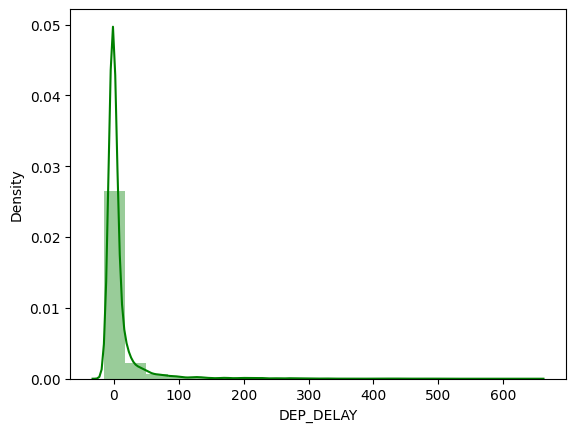

In [ ]:
sns.distplot(df['DEP_DELAY'],color='green',bins=20)

<Axes: xlabel='CRS_ARR_TIME', ylabel='Count'>

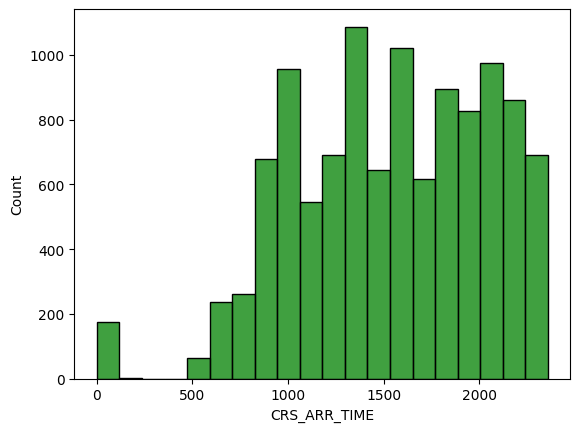

In [ ]:
sns.histplot(df['CRS_ARR_TIME'],color='green',bins=20)

<Axes: >

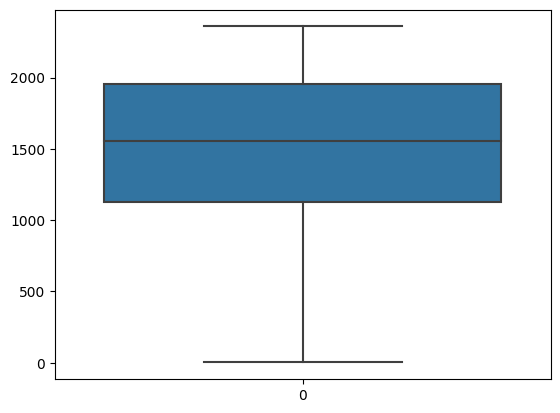

In [ ]:
sns.boxplot(df['CRS_ARR_TIME'])

<Axes: ylabel='DEP_DELAY'>

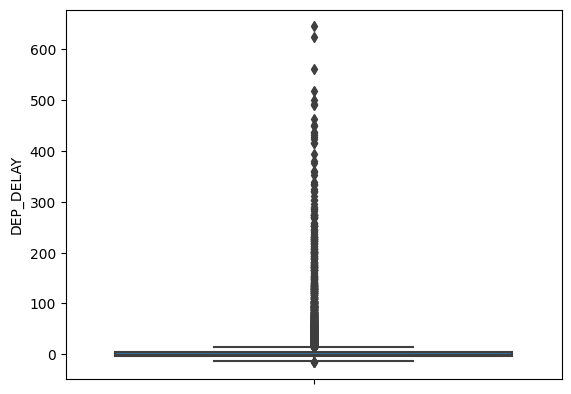

In [ ]:
sns.boxplot(df,y='DEP_DELAY')

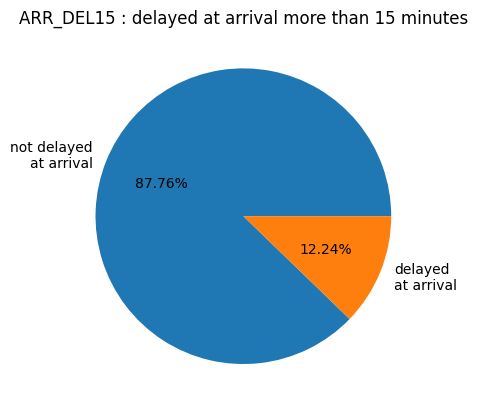

In [ ]:
plt.title('ARR_DEL15 : delayed at arrival more than 15 minutes')
plt.pie(df.ARR_DEL15.value_counts(),labels = ['delayed\nat arrival' if x == 1 else 'not delayed\nat arrival' for x in df.ARR_DEL15.value_counts().index],autopct="%.2f%%")
plt.show()


BIVARIATE ANALYSIS :-

<Axes: xlabel='ARR_DEL15', ylabel='count'>

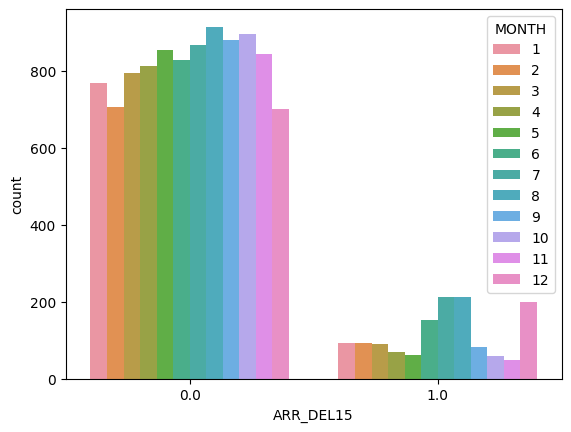

In [ ]:
sns.countplot(data = df,x='ARR_DEL15',hue='MONTH')

<Axes: xlabel='ARR_DEL15', ylabel='count'>

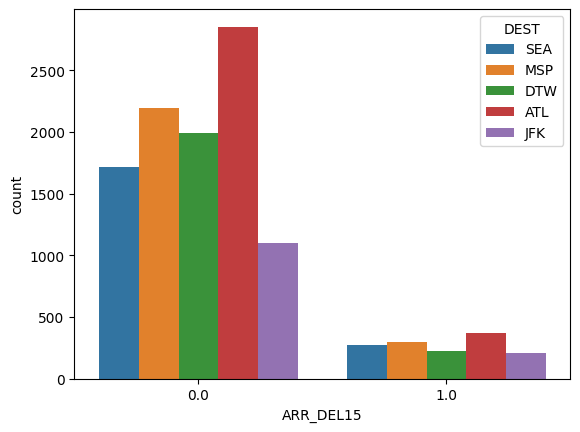

In [ ]:
sns.countplot(data = df,x='ARR_DEL15',hue='DEST')

<Axes: xlabel='ARR_DEL15', ylabel='count'>

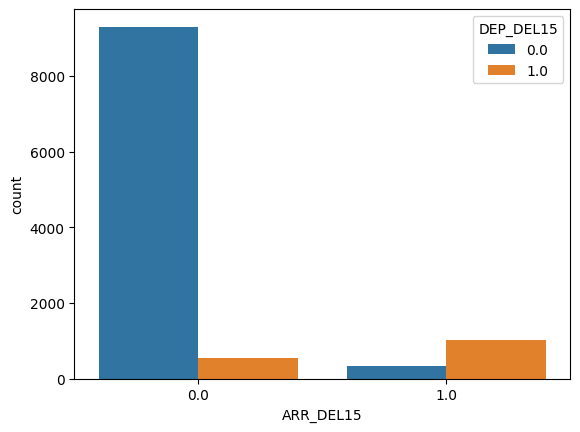

In [ ]:
sns.countplot(data = df,x='ARR_DEL15',hue='DEP_DEL15')

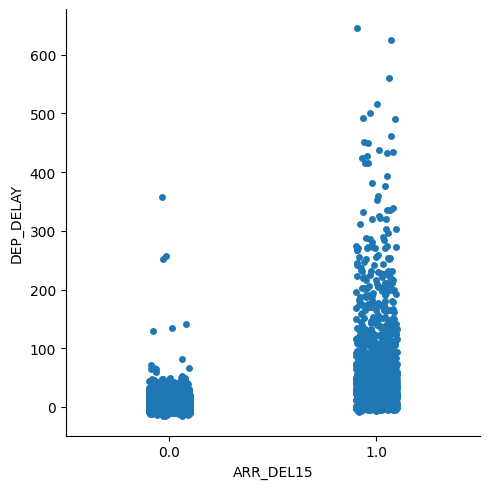

In [ ]:
sns.catplot(x='ARR_DEL15',y='DEP_DELAY',data=df)

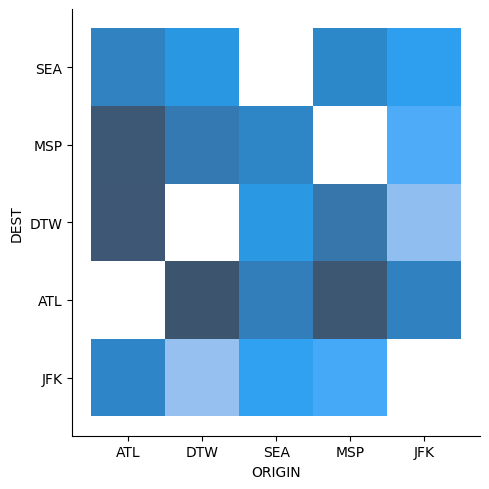

In [ ]:
sns.displot(df,x='ORIGIN',y='DEST')

MULTIVARIATE ANALYSIS :-

<ipython-input-77-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

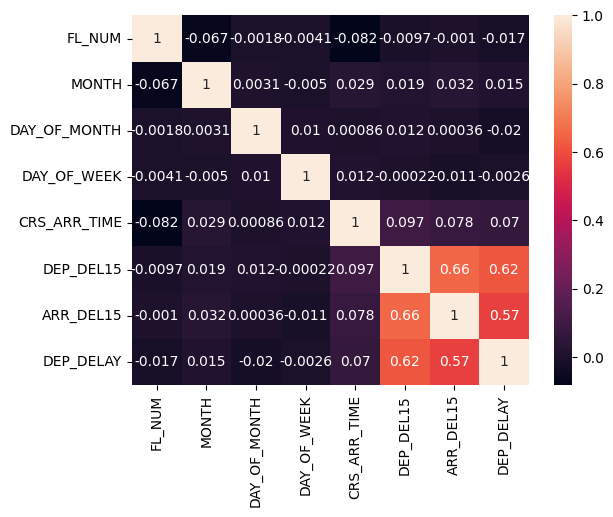

In [ ]:
sns.heatmap(df.corr(),annot=True)

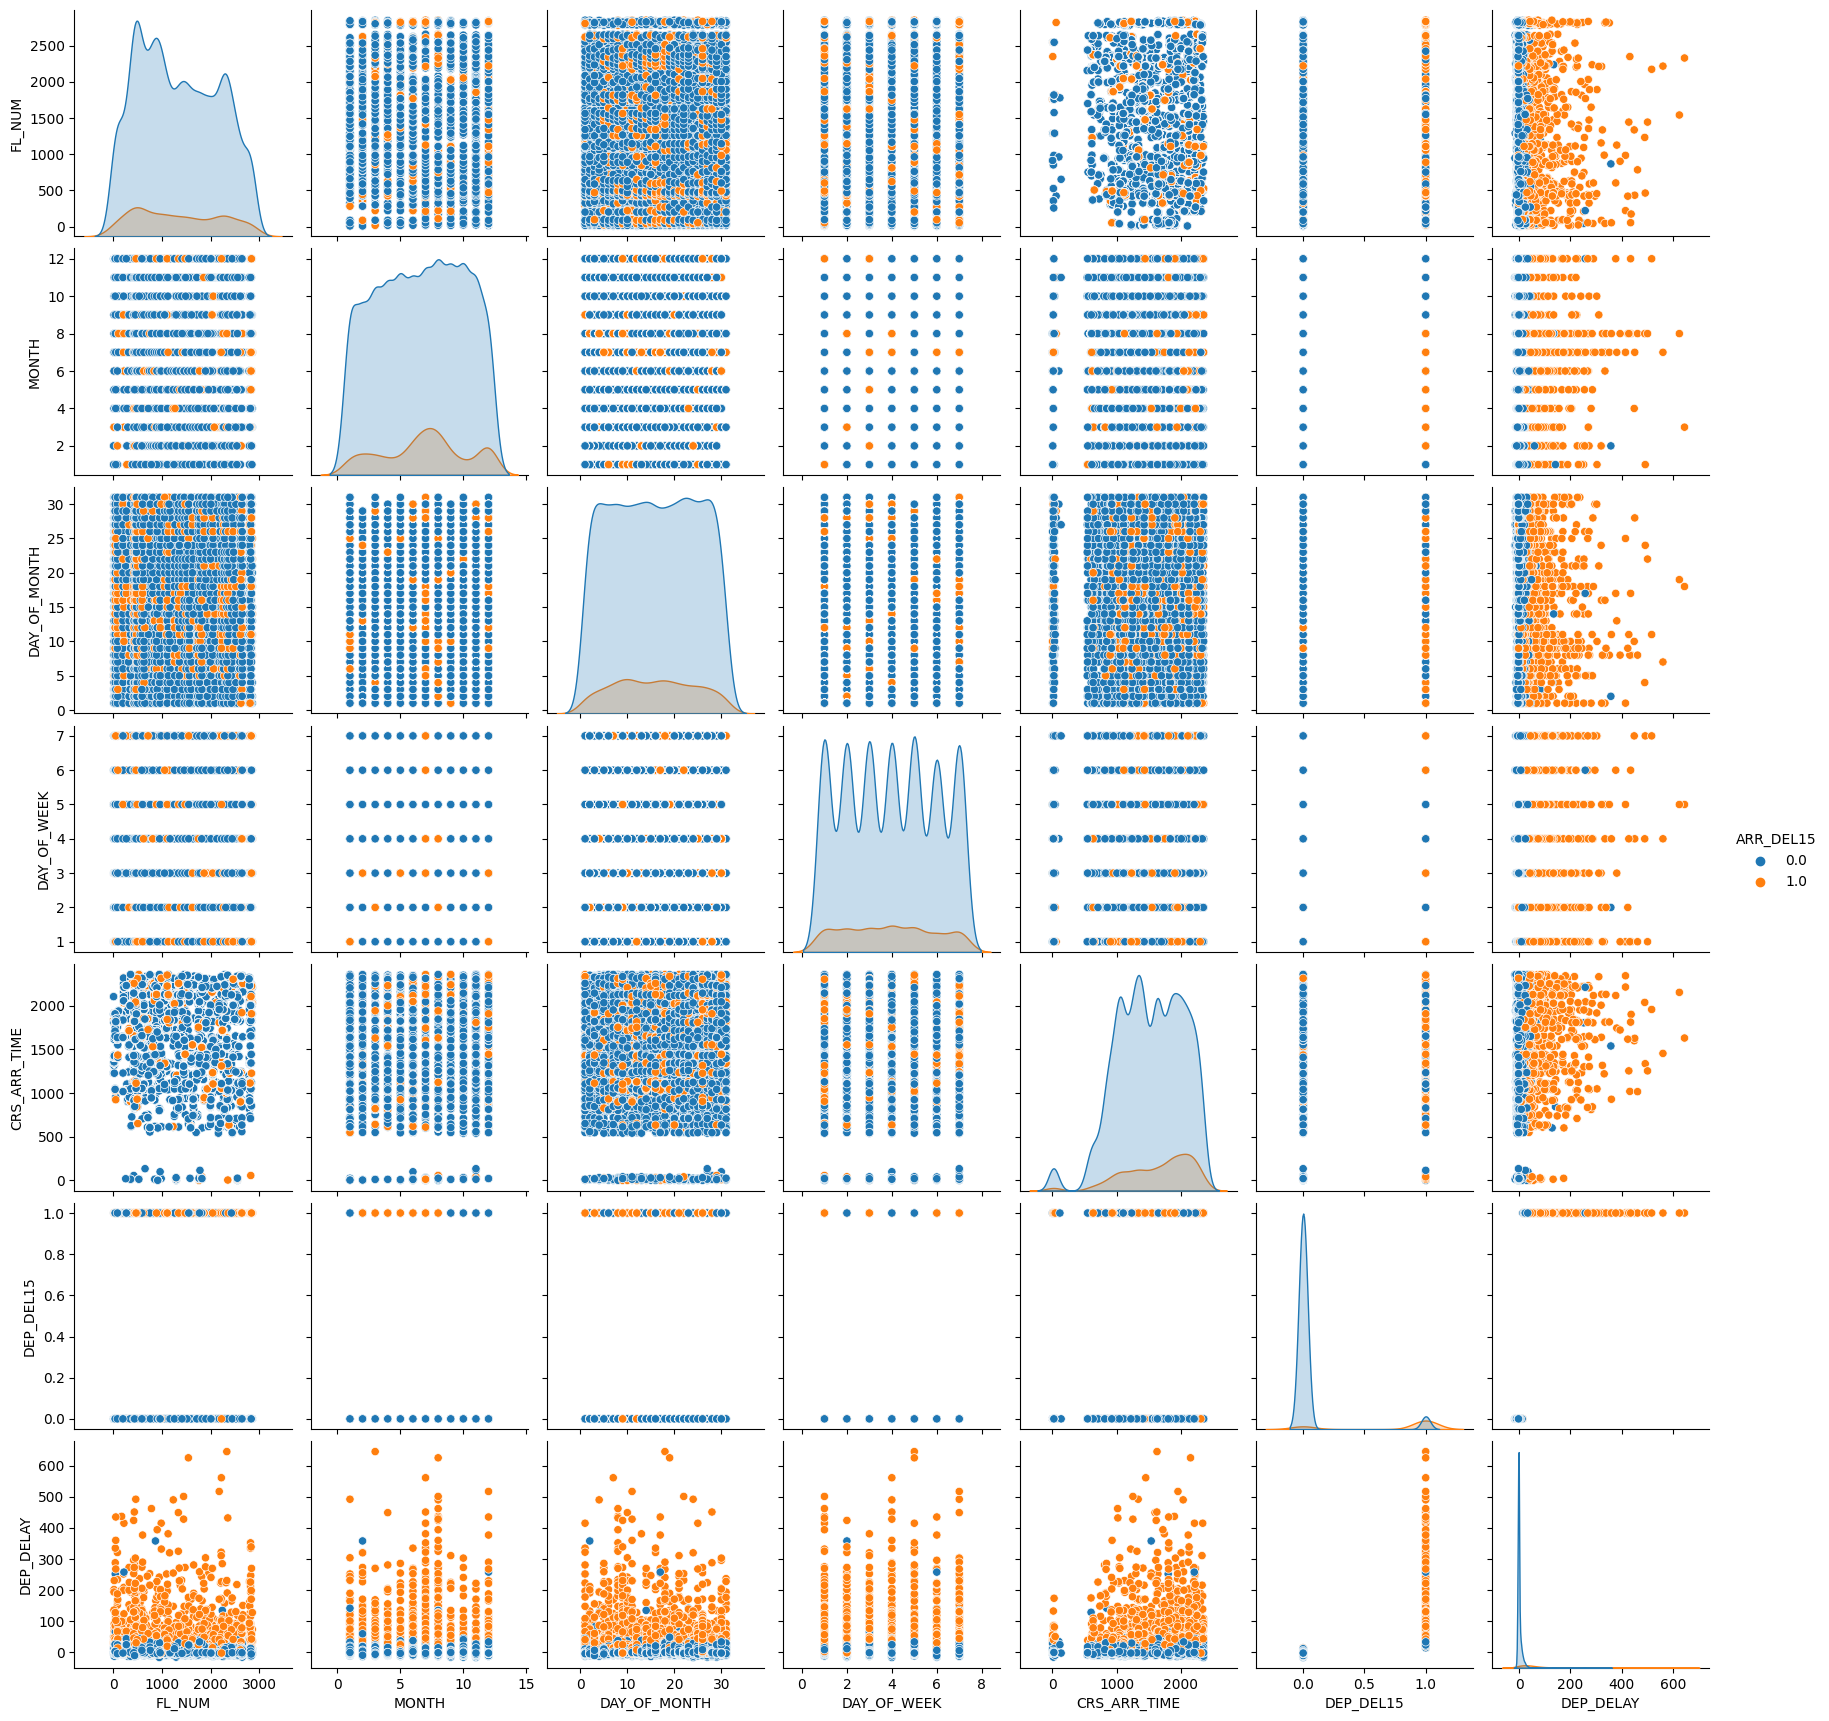

In [ ]:
sns.pairplot(df,hue='ARR_DEL15')

In [ ]:
x = df[['FL_NUM','MONTH','DAY_OF_MONTH','DAY_OF_WEEK','ORIGIN','DEST','CRS_ARR_TIME','DEP_DEL15','DEP_DELAY']]
y = df['ARR_DEL15']

HANDLING CATEGORICAL VALUES & SCALING THE DATA :-

In [ ]:
ct1 = ColumnTransformer([('oe',OrdinalEncoder(),['FL_NUM']),('ohe',OneHotEncoder(sparse_output=False,drop='first'),['MONTH','DAY_OF_MONTH','DAY_OF_WEEK','ORIGIN','DEST'])],remainder='passthrough')
ct2 = ColumnTransformer([('sc',StandardScaler(),['oe__FL_NUM','remainder__CRS_ARR_TIME','remainder__DEP_DELAY'])],remainder='passthrough')

x = pd.DataFrame(ct1.fit_transform(x),columns=ct1.get_feature_names_out())
x = pd.DataFrame(ct2.fit_transform(x),columns=ct2.get_feature_names_out())

x.head()

,sc__oe__FL_NUM,sc__remainder__CRS_ARR_TIME,sc__remainder__DEP_DELAY,remainder__ohe__MONTH_2,remainder__ohe__MONTH_3,remainder__ohe__MONTH_4,remainder__ohe__MONTH_5,remainder__ohe__MONTH_6,remainder__ohe__MONTH_7,remainder__ohe__MONTH_8,remainder__ohe__MONTH_9,remainder__ohe__MONTH_10,remainder__ohe__MONTH_11,remainder__ohe__MONTH_12,remainder__ohe__DAY_OF_MONTH_2,remainder__ohe__DAY_OF_MONTH_3,remainder__ohe__DAY_OF_MONTH_4,remainder__ohe__DAY_OF_MONTH_5,remainder__ohe__DAY_OF_MONTH_6,remainder__ohe__DAY_OF_MONTH_7,remainder__ohe__DAY_OF_MONTH_8,remainder__ohe__DAY_OF_MONTH_9,remainder__ohe__DAY_OF_MONTH_10,remainder__ohe__DAY_OF_MONTH_11,remainder__ohe__DAY_OF_MONTH_12,remainder__ohe__DAY_OF_MONTH_13,remainder__ohe__DAY_OF_MONTH_14,remainder__ohe__DAY_OF_MONTH_15,remainder__ohe__DAY_OF_MONTH_16,remainder__ohe__DAY_OF_MONTH_17,remainder__ohe__DAY_OF_MONTH_18,remainder__ohe__DAY_OF_MONTH_19,remainder__ohe__DAY_OF_MONTH_20,remainder__ohe__DAY_OF_MONTH_21,remainder__ohe__DAY_OF_MONTH_22,remainder__ohe__DAY_OF_MONTH_23,remainder__ohe__DAY_OF_MONTH_24,remainder__ohe__DAY_OF_MONTH_25,remainder__ohe__DAY_OF_MONTH_26,remainder__ohe__DAY_OF_MONTH_27,remainder__ohe__DAY_OF_MONTH_28,remainder__ohe__DAY_OF_MONTH_29,remainder__ohe__DAY_OF_MONTH_30,remainder__ohe__DAY_OF_MONTH_31,remainder__ohe__DAY_OF_WEEK_2,remainder__ohe__DAY_OF_WEEK_3,remainder__ohe__DAY_OF_WEEK_4,remainder__ohe__DAY_OF_WEEK_5,remainder__ohe__DAY_OF_WEEK_6,remainder__ohe__DAY_OF_WEEK_7,remainder__ohe__ORIGIN_DTW,remainder__ohe__ORIGIN_JFK,remainder__ohe__ORIGIN_MSP,remainder__ohe__ORIGIN_SEA,remainder__ohe__DEST_DTW,remainder__ohe__DEST_JFK,remainder__ohe__DEST_MSP,remainder__ohe__DEST_SEA,remainder__remainder__DEP_DEL15
0,0.109290,1.205371,-0.174060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.239959,-0.203612,-0.256033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.395756,-0.641431,-0.174060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.581707,-0.402620,-0.201385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.642016,-1.851405,-0.338007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
pickle.dump(ct1,open('col_trans1.pkl','wb'))
pickle.dump(ct2,open('col_trans2.pkl','wb'))

In [ ]:
x.head()

,sc__oe__FL_NUM,sc__remainder__CRS_ARR_TIME,sc__remainder__DEP_DELAY,remainder__ohe__MONTH_2,remainder__ohe__MONTH_3,remainder__ohe__MONTH_4,remainder__ohe__MONTH_5,remainder__ohe__MONTH_6,remainder__ohe__MONTH_7,remainder__ohe__MONTH_8,remainder__ohe__MONTH_9,remainder__ohe__MONTH_10,remainder__ohe__MONTH_11,remainder__ohe__MONTH_12,remainder__ohe__DAY_OF_MONTH_2,remainder__ohe__DAY_OF_MONTH_3,remainder__ohe__DAY_OF_MONTH_4,remainder__ohe__DAY_OF_MONTH_5,remainder__ohe__DAY_OF_MONTH_6,remainder__ohe__DAY_OF_MONTH_7,remainder__ohe__DAY_OF_MONTH_8,remainder__ohe__DAY_OF_MONTH_9,remainder__ohe__DAY_OF_MONTH_10,remainder__ohe__DAY_OF_MONTH_11,remainder__ohe__DAY_OF_MONTH_12,remainder__ohe__DAY_OF_MONTH_13,remainder__ohe__DAY_OF_MONTH_14,remainder__ohe__DAY_OF_MONTH_15,remainder__ohe__DAY_OF_MONTH_16,remainder__ohe__DAY_OF_MONTH_17,remainder__ohe__DAY_OF_MONTH_18,remainder__ohe__DAY_OF_MONTH_19,remainder__ohe__DAY_OF_MONTH_20,remainder__ohe__DAY_OF_MONTH_21,remainder__ohe__DAY_OF_MONTH_22,remainder__ohe__DAY_OF_MONTH_23,remainder__ohe__DAY_OF_MONTH_24,remainder__ohe__DAY_OF_MONTH_25,remainder__ohe__DAY_OF_MONTH_26,remainder__ohe__DAY_OF_MONTH_27,remainder__ohe__DAY_OF_MONTH_28,remainder__ohe__DAY_OF_MONTH_29,remainder__ohe__DAY_OF_MONTH_30,remainder__ohe__DAY_OF_MONTH_31,remainder__ohe__DAY_OF_WEEK_2,remainder__ohe__DAY_OF_WEEK_3,remainder__ohe__DAY_OF_WEEK_4,remainder__ohe__DAY_OF_WEEK_5,remainder__ohe__DAY_OF_WEEK_6,remainder__ohe__DAY_OF_WEEK_7,remainder__ohe__ORIGIN_DTW,remainder__ohe__ORIGIN_JFK,remainder__ohe__ORIGIN_MSP,remainder__ohe__ORIGIN_SEA,remainder__ohe__DEST_DTW,remainder__ohe__DEST_JFK,remainder__ohe__DEST_MSP,remainder__ohe__DEST_SEA,remainder__remainder__DEP_DEL15
0,0.109290,1.205371,-0.174060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.239959,-0.203612,-0.256033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.395756,-0.641431,-0.174060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.581707,-0.402620,-0.201385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.642016,-1.851405,-0.338007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: ARR_DEL15, dtype: float64

SPLITTING THE DATASET INTO TRAINING AND TESTING :-

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)

**MODEL BUILDING :-**

RANDOM FOREST MODEL :-

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)

acc = accuracy_score(y_test,y_pred)
acc

0.9425901201602136

DECISION TREE MODEL :-

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)

acc = accuracy_score(y_test,y_pred)
acc

0.9020916777926123

ANN MODEL :-

In [ ]:
ann = Sequential()
ann.add(Dense(8,activation='relu'))
ann.add(Dense(32,activation='relu'))
ann.add(Dense(32,activation='relu'))
ann.add(Dense(1,activation='sigmoid'))

ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

ann.fit(x_train,y_train,batch_size=4,validation_split=0.2,epochs=15)

Epoch 1/15
1797/1797 [==============================] - 5s 2ms/step - loss: 0.2333 - accuracy: 0.9217 - val_loss: 0.2344 - val_accuracy: 0.9238
Epoch 2/15
1797/1797 [==============================] - 4s 2ms/step - loss: 0.1771 - accuracy: 0.9421 - val_loss: 0.2213 - val_accuracy: 0.9238
Epoch 3/15
1797/1797 [==============================] - 6s 3ms/step - loss: 0.1716 - accuracy: 0.9431 - val_loss: 0.2309 - val_accuracy: 0.9226
Epoch 4/15
1797/1797 [==============================] - 4s 2ms/step - loss: 0.1679 - accuracy: 0.9438 - val_loss: 0.2247 - val_accuracy: 0.9277
Epoch 5/15
1797/1797 [==============================] - 4s 2ms/step - loss: 0.1645 - accuracy: 0.9450 - val_loss: 0.2272 - val_accuracy: 0.9243
Epoch 6/15
1797/1797 [==============================] - 6s 3ms/step - loss: 0.1625 - accuracy: 0.9467 - val_loss: 0.2304 - val_accuracy: 0.9260
Epoch 7/15
1797/1797 [==============================] - 4s 2ms/step - loss: 0.1596 - accuracy: 0.9467 - val_loss: 0.2323 - val_accuracy:

In [ ]:
y_pred = ann.predict(x_train)

y_pred = [0 if x<0.5 else 1 for x in y_pred]
acc = accuracy_score(y_train,y_pred)
print('train data prediction accuracy : ',acc)

y_pred = ann.predict(x_test)

y_pred = [0 if x<0.5 else 1 for x in y_pred]
acc = accuracy_score(y_test,y_pred)
print('test data prediction accuracy : ',acc)

281/281 [==============================] - 1s 2ms/step
train data prediction accuracy :  0.9491317898486198
71/71 [==============================] - 0s 1ms/step
test data prediction accuracy :  0.9345794392523364


HYPER PARAMETER TUNING :-

In [ ]:
from scipy.stats import randint
params = {
    'n_estimators':[int(x) for x in np.linspace(50,500,50)],
    'criterion':['gini','entropy'],
    'max_features':['sqrt','log2'],
    'max_depth':[None,5,10,15,20,25,30],
    'min_samples_split':[int(x) for x in np.linspace(2,20)],
    'min_samples_leaf':[int(x) for x in np.linspace(1,20)],
}
rscv = RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=params,cv=5,random_state=42)
rscv.fit(x_train,y_train)

y_pred = rscv.predict(x_test)
acc = accuracy_score(y_pred,y_test)
print('accuracy score : ',acc)
print(rscv.best_params_)

accuracy score :  0.9457053849577214
{'n_estimators': 114, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'entropy'}


In [ ]:
rfc2 = RandomForestClassifier(n_estimators= 114, min_samples_split= 7, min_samples_leaf= 3, max_features= 'sqrt', max_depth= 20, criterion= 'entropy')
rfc2.fit(x_train,y_train)
y_pred = rfc2.predict(x_test)

acc = accuracy_score(y_test,y_pred)
print('accuracy score : ',acc)

accuracy score :  0.945260347129506


In [ ]:
params = {
    'max_depth':list(range(3,14,2)),
    'criterion':['gini','entropy'],
    'min_samples_split':list(range(2,11,2)),
    'min_samples_leaf':list(range(1,6))
}
gscv = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=params,cv=5,scoring='accuracy')
gscv.fit(x_train,y_train)

y_pred = gscv.predict(x_test)
acc = accuracy_score(y_pred,y_test)
print('accuracy score : ',acc)
print(gscv.best_params_)

accuracy score :  0.9434801958166444
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
dtc2 = DecisionTreeClassifier(criterion= 'entropy', max_depth= 5, min_samples_leaf= 1, min_samples_split= 2)
dtc2.fit(x_train,y_train)
y_pred = dtc2.predict(x_test)

acc = accuracy_score(y_test,y_pred)
print('accuracy score : ',acc)

accuracy score :  0.943035157988429


TESTING THE MODEL WITH MULTIPLE EVALUATION METRICS ( AFTER HYPER PARAMETER TUNING ) :-

In [ ]:
def cl_res(name,model):
    y_pred = model.predict(x_test)
    if(name=='artificial_neural_network'):
        y_pred = [0 if x<0.5 else 1 for x in y_pred]
    print(name,' :-\n-------------------------')
    print('accuracy score of ',name,' : ',accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred,target_names=['no delay','delay']))
    print('confusion matrix : \n',confusion_matrix(y_test,y_pred))
    print('\n')
    # plt.subplot(121)
    plt.figure(figsize=(3,2))
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
    # plt.subplot(122)
    plt.figure(figsize=(1,1))
    RocCurveDisplay.from_predictions(y_test,y_pred)
    plt.show()
    print('\n\n')

random_forest_classifier(before tuning)  :-
-------------------------
accuracy score of  random_forest_classifier(before tuning)  :  0.9425901201602136
              precision    recall  f1-score   support

    no delay       0.95      0.98      0.97      1962
       delay       0.84      0.68      0.75       285

    accuracy                           0.94      2247
   macro avg       0.90      0.83      0.86      2247
weighted avg       0.94      0.94      0.94      2247

confusion matrix : 
 [[1924   38]
 [  91  194]]




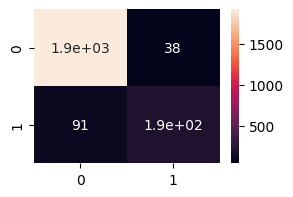

<Figure size 100x100 with 0 Axes>

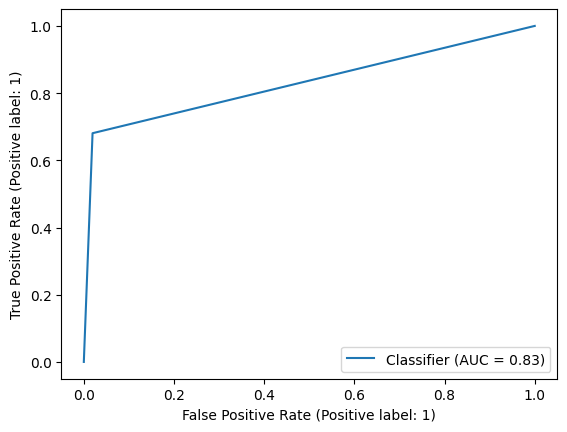

In [ ]:
cl_res('random_forest_classifier(before tuning)',rfc)

random_forest_classifier(after tuning)  :-
-------------------------
accuracy score of  random_forest_classifier(after tuning)  :  0.945260347129506
              precision    recall  f1-score   support

    no delay       0.96      0.98      0.97      1962
       delay       0.85      0.69      0.76       285

    accuracy                           0.95      2247
   macro avg       0.90      0.84      0.87      2247
weighted avg       0.94      0.95      0.94      2247

confusion matrix : 
 [[1928   34]
 [  89  196]]




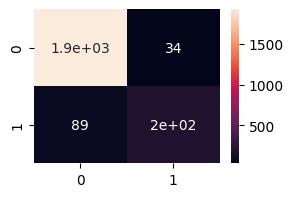

<Figure size 100x100 with 0 Axes>

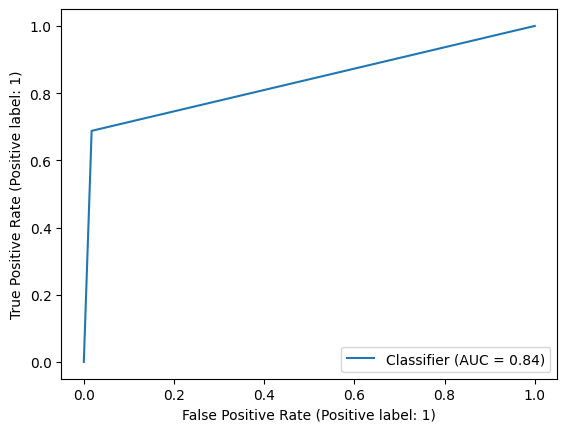

In [ ]:
cl_res('random_forest_classifier(after tuning)',rfc2)

decision_tree_classifier(before tuning)  :-
-------------------------
accuracy score of  decision_tree_classifier(before tuning)  :  0.9020916777926123
              precision    recall  f1-score   support

    no delay       0.95      0.93      0.94      1962
       delay       0.60      0.69      0.64       285

    accuracy                           0.90      2247
   macro avg       0.78      0.81      0.79      2247
weighted avg       0.91      0.90      0.91      2247

confusion matrix : 
 [[1829  133]
 [  87  198]]




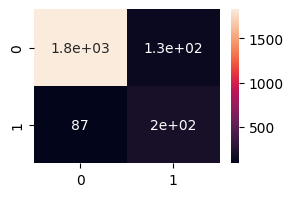

<Figure size 100x100 with 0 Axes>

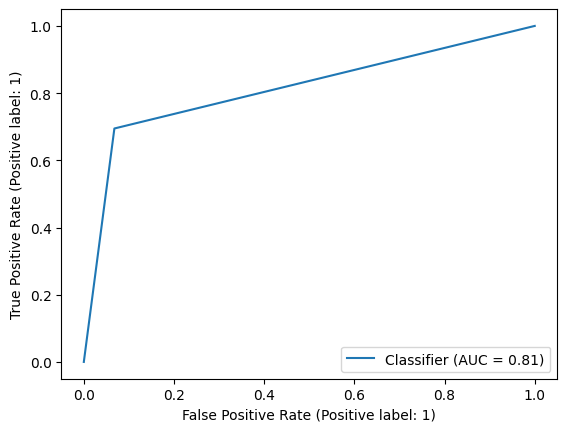

In [ ]:
cl_res('decision_tree_classifier(before tuning)',dtc)

decision_tree_classifier(after tuning)  :-
-------------------------
accuracy score of  decision_tree_classifier(after tuning)  :  0.943035157988429
              precision    recall  f1-score   support

    no delay       0.95      0.99      0.97      1962
       delay       0.87      0.65      0.74       285

    accuracy                           0.94      2247
   macro avg       0.91      0.82      0.85      2247
weighted avg       0.94      0.94      0.94      2247

confusion matrix : 
 [[1935   27]
 [ 101  184]]




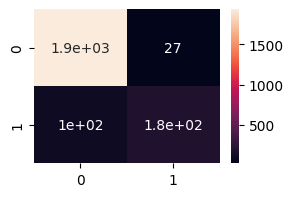

<Figure size 100x100 with 0 Axes>

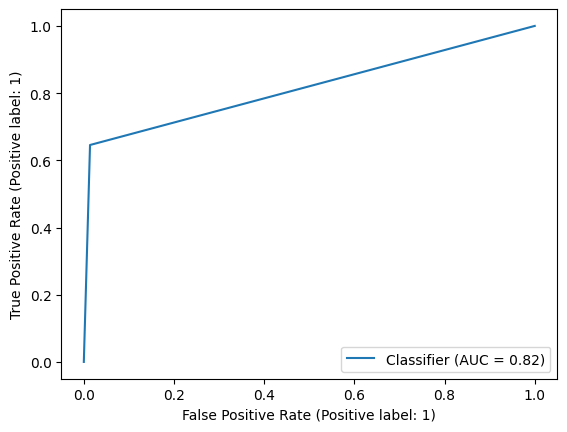

In [ ]:
cl_res('decision_tree_classifier(after tuning)',dtc2)

71/71 [==============================] - 0s 1ms/step
artificial_neural_network  :-
-------------------------
accuracy score of  artificial_neural_network  :  0.9345794392523364
              precision    recall  f1-score   support

    no delay       0.95      0.97      0.96      1962
       delay       0.78      0.68      0.73       285

    accuracy                           0.93      2247
   macro avg       0.87      0.83      0.84      2247
weighted avg       0.93      0.93      0.93      2247

confusion matrix : 
 [[1906   56]
 [  91  194]]




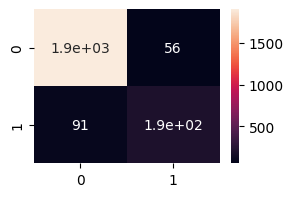

<Figure size 100x100 with 0 Axes>

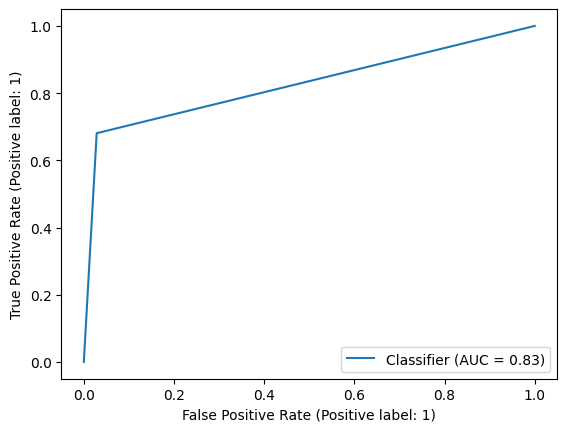

In [ ]:
cl_res('artificial_neural_network',ann)

*   Here Random Forest Classifier (after tuning)  has the highest accuracy score and good at other evaluation metrics, so we are going to save that model.

**SAVING THE MODEL :-**


In [ ]:
pickle.dump(rfc2,open('random_forest_classifier.pkl','wb'))